# Part 3: Clustering

Clustering is an unsuperivsed ML method used to group data points based on their features alone, and no observed grouping labels as in supervised classification. Thus most clustering alorithms seeks to group points by their distance in a high dimensional space generated by provided features.

Below is a plot showing the results of the clustering algorithms in Scikit-Learn for several different toy datasets.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'/>

## 1) K-means clustering  

In this section we will cover k-means clustering using `scikit-learn`. The scikit-learn documentation for clustering is found [here](http://scikit-learn.org/stable/modules/clustering.html).

First we'll import `KMeans` and `numpy` so that we can make our arrays. The `%matplotlib inline` will make our plots show up within the notebook.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We'll start off with a few points. Remember, as with classification and regression, our data should be in a numpy array.

In [2]:
X = np.array([[0,1], [1,2], [1, 0], [-1, -3],
             [15, 21], [18, 30], [20, 20], [22, 19],
             [45, 50], [42, 48], [60, 40], [50, 50]])
X

array([[ 0,  1],
       [ 1,  2],
       [ 1,  0],
       [-1, -3],
       [15, 21],
       [18, 30],
       [20, 20],
       [22, 19],
       [45, 50],
       [42, 48],
       [60, 40],
       [50, 50]])

If we plot them we can see that they appear to be arranged roughly in three groups.

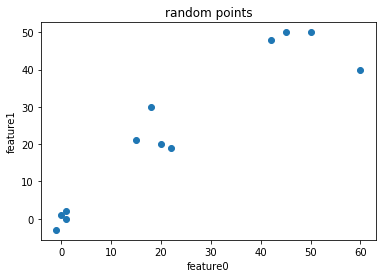

In [3]:
plt.scatter(*X.T)
plt.title('random points')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

To get our clusters, all we have to do is specify how many we want, and then fit the model to the data. We'll choose 3. We can also specify the maximum number of iterations of the k-means algorithm, which you may want to do with a much larger dataset.

First thing's first: **set a random seed!**

In [4]:
np.random.seed(10)

Now we can create the model. Notice how we are chaining the 'fit' function onto the model instantiation. 

In [5]:
kmeans = KMeans(n_clusters=3,
               max_iter=300 #default
               ).fit(X)

We can access the centers of the clusters through the `cluster_centers_` attribute. To get the labels (i.e. the corresponding cluster) we use `labels_`.

In [6]:
print("Centers")
print(kmeans.cluster_centers_)
print()

print("Labels")
print(kmeans.labels_)
print()

for point, label in zip(X, kmeans.labels_):
    print("Coordinates:", point, "Label:", label)

Centers
[[18.75 22.5 ]
 [49.25 47.  ]
 [ 0.25  0.  ]]

Labels
[2 2 2 2 0 0 0 0 1 1 1 1]

Coordinates: [0 1] Label: 2
Coordinates: [1 2] Label: 2
Coordinates: [1 0] Label: 2
Coordinates: [-1 -3] Label: 2
Coordinates: [15 21] Label: 0
Coordinates: [18 30] Label: 0
Coordinates: [20 20] Label: 0
Coordinates: [22 19] Label: 0
Coordinates: [45 50] Label: 1
Coordinates: [42 48] Label: 1
Coordinates: [60 40] Label: 1
Coordinates: [50 50] Label: 1


Now let's also plot out cluster centers along with the points.

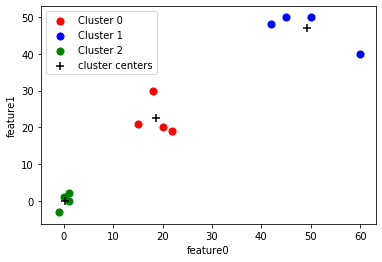

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, marker='+', c='black', label='cluster centers')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

If we want to see to which cluster a new point would belong, we simply use the `predict` method.

Predictions:

0, 4
Cluster: [2]

19, 25
Cluster: [0]

40, 50
Cluster: [1]


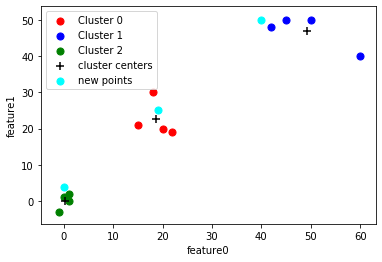

In [8]:
new_points = np.asarray([[0, 4],
                        [19, 25],
                        [40, 50]])

print("Predictions:")
print()

print("0, 4")
print("Cluster:", kmeans.predict([[0, 4]]))
print()

print("19, 25")
print("Cluster:", kmeans.predict([[19, 25]]))
print()

print("40, 50")
print("Cluster:", kmeans.predict([[40, 50]]))

#plot new points

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*X[kmeans.labels_==0,:].T, s=50, c='r', label='Cluster 0')
ax1.scatter(*X[kmeans.labels_==1,:].T, s=50, c='b', label='Cluster 1')
ax1.scatter(*X[kmeans.labels_==2,:].T, s=50, c='g', label='Cluster 2')
ax1.scatter(*kmeans.cluster_centers_.T, s=50, c='black', marker='+', label='cluster centers')
ax1.scatter(*new_points.T, s=50, c='cyan', label='new points')
plt.legend(loc='upper left')
plt.xlabel('feature0')
plt.ylabel('feature1')
plt.show()

## 2) Agglomerative clustering

Now we'll show an example of agglomerative clustering, which is a type of hierarchical clustering. The documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) in case you want to know more about the parameters. We'll use some of scikitlearn's toy datasets.

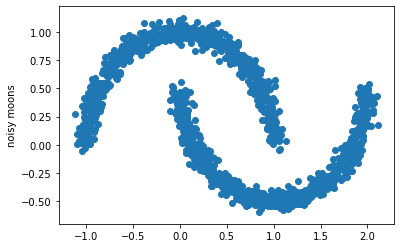

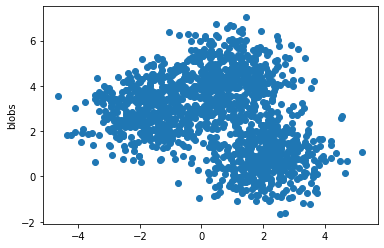

In [9]:
from sklearn import datasets

n_samples = 1500

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
blobs, blob_truth = datasets.make_blobs(n_samples=n_samples, random_state=0)

plt.scatter(*noisy_moons.T)
plt.ylabel('noisy moons')
plt.show()

plt.scatter(*blobs.T)
plt.ylabel('blobs')
plt.show()

We'll use two clusters this time, and use ward linkage.

In [10]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3,
                               linkage='ward', #linkage can be ward (default), complete, or average
                               affinity='euclidean') #affinity must be euclidean if linkage=ward

Now we'll fit the clustering model on the dataset.

In [11]:
ward.fit(noisy_moons)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

Here we'll sort the points by label and then plot them.

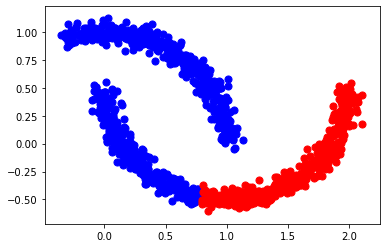

In [12]:
zero = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, noisy_moons) if label == 1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
plt.show()

Now we'll do the same with the blobs dataset.

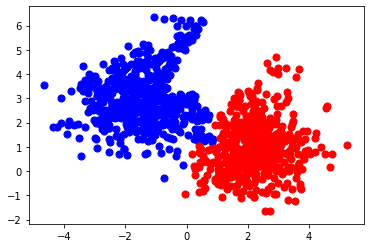

In [13]:
ward.fit(blobs)

zero = np.array([point for label, point in zip(ward.labels_, blobs) if label == 0])
one = np.array([point for label, point in zip(ward.labels_, blobs) if label == 1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
plt.show()

## Challenge: DBSCAN 


It looks like our agglomerative clustering model did not cluster the noisy moons dataset how we might have wanted. For the challenge, use [`DBSCAN`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to cluster noisy moons. Then plot the results and see what it looks like. Try an `eps` value of .2. This sets the maximum distance between two samples for them to be considered in the same neighborhood.

In [14]:
# import model object
from sklearn.cluster import DBSCAN

# define model object
dbscan = DBSCAN(eps=.2)

# fit model to data 
dbscan.fit(noisy_moons);

In [15]:
# get fitted labels for each data point 
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
len(set(labels)) 

2

Check if there any outliers not included in either cluster (indicated with a `-1`).

In [17]:
# get inferred clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

Let's plot the results

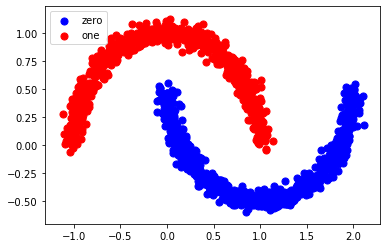

In [18]:
# split data into those for each cluster 
zero = np.array([point for label, point in zip(dbscan.labels_, noisy_moons) if label == 0])
one = np.array([point for label, point in zip(dbscan.labels_, noisy_moons) if label == 1])

# plot data with cluster assignment as the color 
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(*zero.T, s=50, c='b', label='zero')
ax1.scatter(*one.T, s=50, c='r', label='one')
plt.legend(loc='upper left')
plt.show()

Now let's fit another DBSCAN model to the blobs data.

In [19]:
# define model object
dbscan = DBSCAN(eps=0.2)

# fit model to data 
dbscan.fit(blobs)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [20]:
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 4, 0], dtype=int64)

Again, see if there are outliers not included in any cluster

In [21]:
# get inferred clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

19

And let's plot the points in the blobs dataset, coloring them by their cluster id.

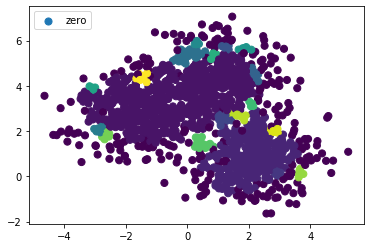

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(blobs[:,0],blobs[:,1], s=50, c=labels, label='zero')

plt.legend(loc='upper left')
plt.show()